In [1]:
%matplotlib inline
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('json/aid.json') as data_file:
    data = data_file.readlines()

first = data[0]
j = json.loads(first.rstrip())

biomes = []

for l in data:
    bio = json.loads(l.rstrip())
    if(bio['biome'] != None):
        biomes.append(bio['biome']['biome'])
    else:
        biomes.append("NONE")

biomedf = pd.Series(data = biomes).value_counts()


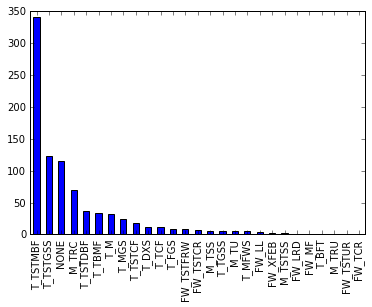

In [2]:
biomedf.plot.bar()

In [3]:
interv = []

print(json.loads(data[0].rstrip())['interv']['Int_type'])

for l in data:
    inter = json.loads(l.rstrip())
    if(inter['interv'] != None):
        interv.append(inter['interv']['Int_type'])
    else:
        interv.append("NONE")

intervdf = pd.Series(data = interv).value_counts()
pprint(intervdf)


sp_mgmt
area_protect    287
res_mgmt        215
area_mgmt       149
NONE             76
liv_alt          46
sp_mgmt          26
cons_fin         14
aware_comm        9
pol_reg           9
market            9
restoration       7
training          6
form_ed           5
legis             5
sp_reint          4
sp_control        2
sub               1
non_mon           1
inst_civ_dev      1
other             1
sus_use           1
dtype: int64


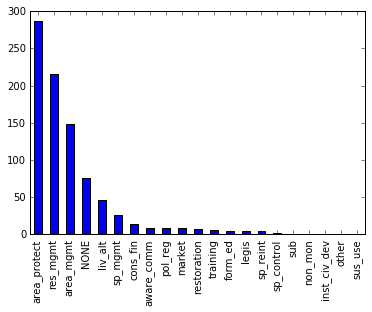

In [4]:
intervdf.plot.bar()

In [5]:
outcomes = []

print(json.loads(data[0].rstrip())['outcome']['Outcome'])

for l in data:
    outcome = json.loads(l.rstrip())
    if(outcome['outcome'] != None):
        outcomes.append(outcome['outcome']['Outcome'])
    else:
        outcomes.append("NONE")

outcomedf = pd.Series(data = outcomes).value_counts()
pprint(outcomedf)

soc_rel
env            272
eco_liv_std    201
mat_liv_std    163
NONE            76
NA              42
soc_rel         39
education       38
gov             28
sub_well         6
sec_saf          5
health           4
dtype: int64


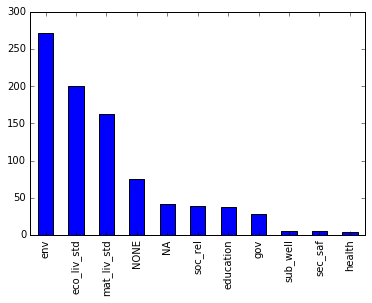

In [6]:
outcomedf.plot.bar()

In [7]:
def seriesToMap(series):
    a = pd.np.array(series.keys())
    i = 0
    dict = {}
    for s in a:
        dict[s] = i
        i += 1
    return dict

biomeMap = seriesToMap(biomedf)
outcomeMap = seriesToMap(outcomedf)
internvMap = seriesToMap(intervdf)

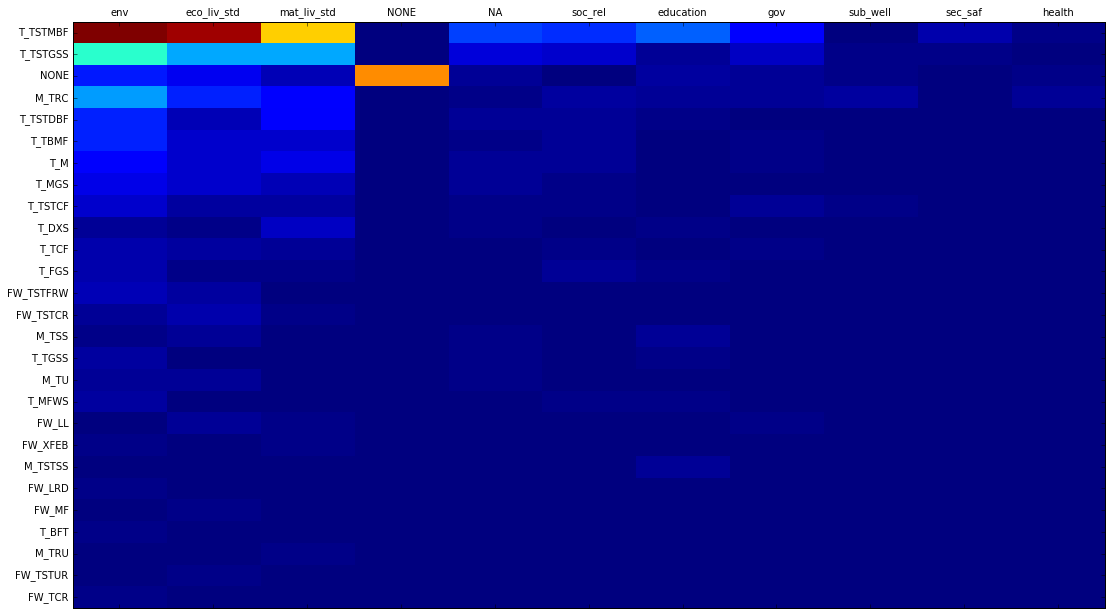

In [10]:
import matplotlib
m = len(biomeMap)
n = len(outcomeMap)
matrix = np.zeros( (m,n) )
for l in data:
    j = json.loads(l.rstrip())
    outcome = j['outcome']
    biome = j['biome']
    oc = 0
    if(outcome == None):
        oc = outcomeMap['NONE']
    else:
        oc = outcomeMap[outcome['Outcome']]
    bi = 0
    if(biome == None):
        bi = biomeMap['NONE']
    else:
        bi = biomeMap[biome["biome"]]
    matrix[bi,oc] += 1
    
outbio = pd.DataFrame(data=matrix,columns=outcomedf.keys(),index=biomedf.keys())
show = plt.matshow(outbio, interpolation='nearest', aspect='auto')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

ax = show.axes
_ = ax.set_xticks(np.linspace(0, n-1, n))
_ = ax.set_xticklabels(outbio.columns)
_ = ax.set_yticks(np.linspace(0, m-1, m))
_ = ax.set_yticklabels(outbio.index)


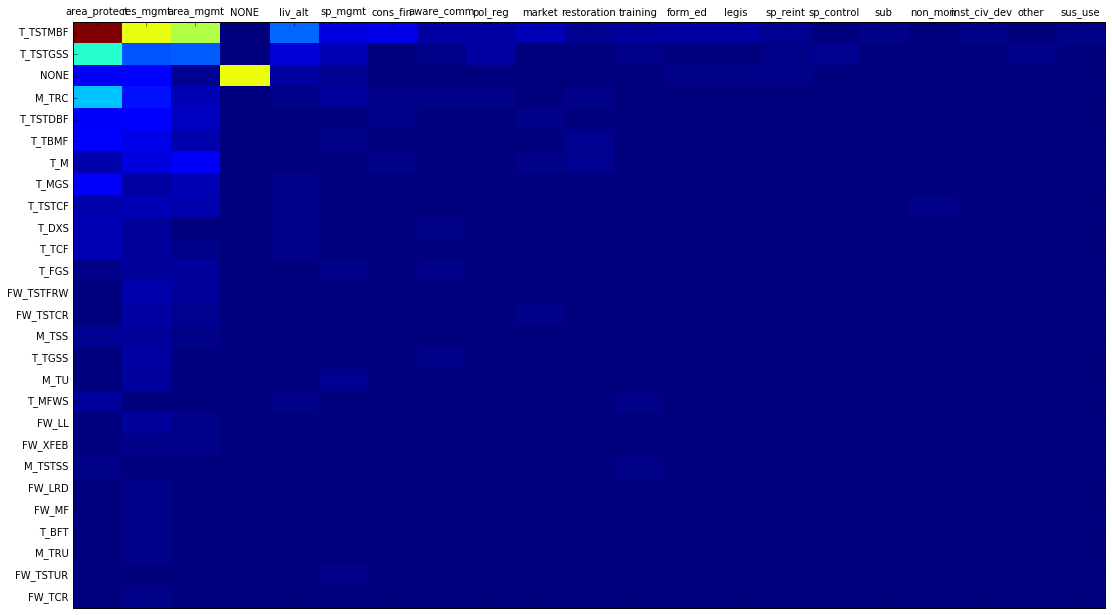

In [11]:
m = len(biomeMap)
n = len(internvMap)
matrix2 = np.zeros( (m,n) )
for l in data:
    j = json.loads(l.rstrip())
    interv = j['interv']
    biome = j['biome']
    oc = 0
    if(interv == None):
        oc = internvMap['NONE']
    else:
        oc = internvMap[interv['Int_type']]
    bi = 0
    if(biome == None):
        bi = biomeMap['NONE']
    else:
        bi = biomeMap[biome["biome"]]
    matrix2[bi,oc] += 1
    
outbio = pd.DataFrame(data=matrix2,columns=intervdf.keys(),index=biomedf.keys())
show = plt.matshow(outbio, interpolation='nearest', aspect='auto')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

ax = show.axes
_ = ax.set_xticks(np.linspace(0, n-1, n))
_ = ax.set_xticklabels(outbio.columns)
_ = ax.set_yticks(np.linspace(0, m-1, m))
_ = ax.set_yticklabels(outbio.index)


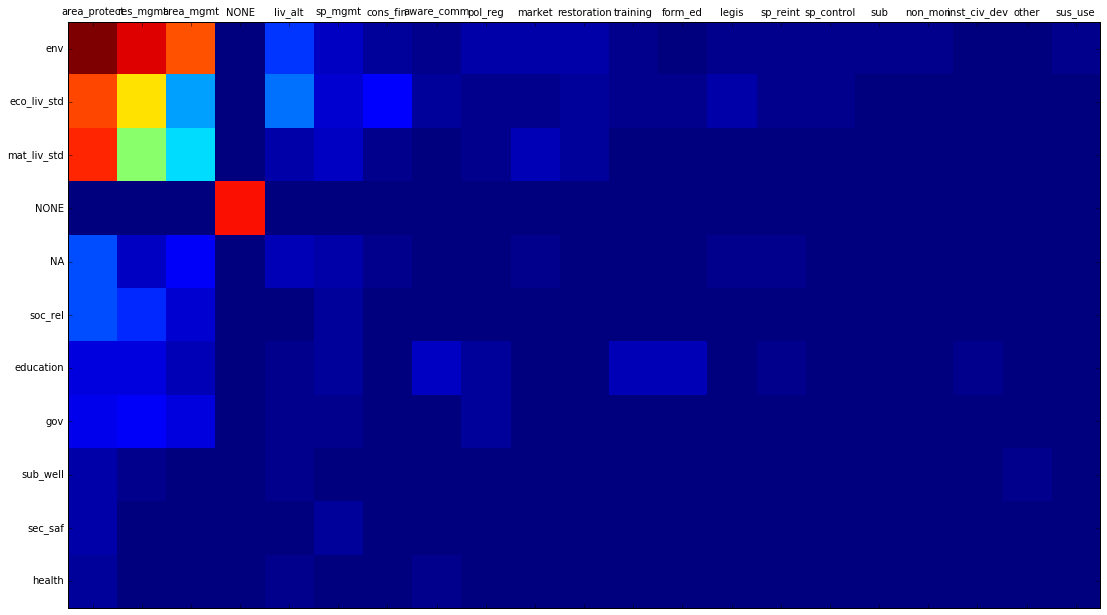

In [20]:
m = len(outcomeMap)
n = len(internvMap)
matrix3 = np.zeros( (m,n) )
for l in data:
    j = json.loads(l.rstrip())
    interv = j['interv']
    outcome = j['outcome']
    oc = 0
    if(interv == None):
        oc = internvMap['NONE']
    else:
        oc = internvMap[interv['Int_type']]
    bi = 0
    if(outcome == None):
        bi = outcomeMap['NONE']
    else:
        bi = outcomeMap[outcome["Outcome"]]
    matrix3[bi,oc] += 1
    
outbio = pd.DataFrame(data=matrix3,columns=intervdf.keys(),index=outcomedf.keys())
show = plt.matshow(outbio, interpolation='nearest', aspect='auto')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

ax = show.axes
_ = ax.set_xticks(np.linspace(0, n-1, n))
_ = ax.set_xticklabels(outbio.columns)
_ = ax.set_yticks(np.linspace(0, m-1, m))
_ = ax.set_yticklabels(outbio.index)


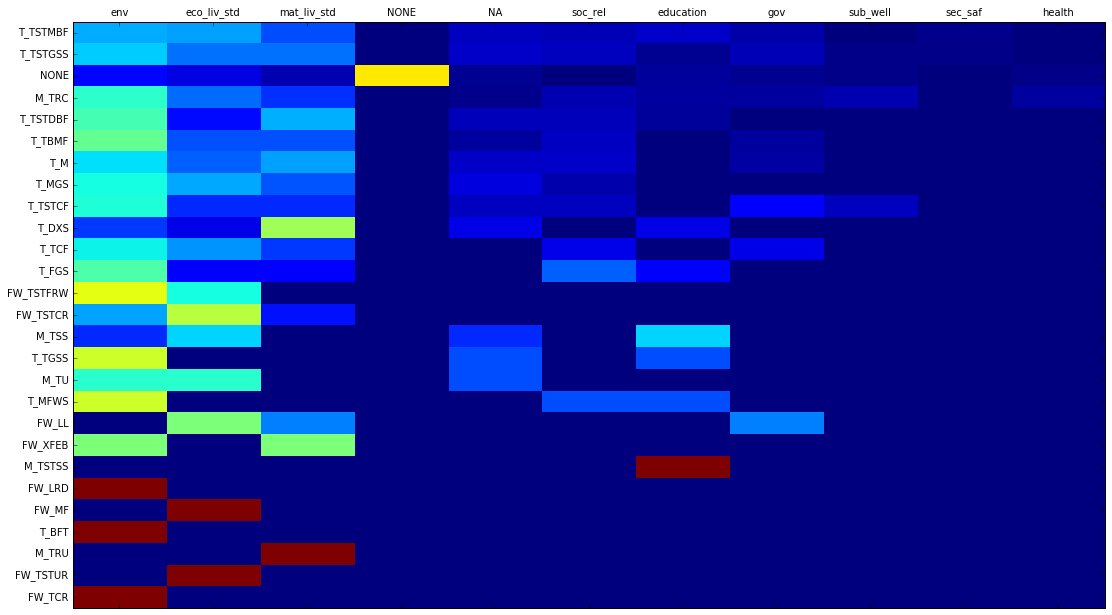

In [27]:
m = len(biomeMap)
n = len(outcomeMap)
rowmat1 = (matrix / matrix.sum(axis=1)[:,None])*100

outbio = pd.DataFrame(data=rowmat1,columns=outcomedf.keys(),index=biomedf.keys())
show = plt.matshow(outbio, interpolation='nearest', aspect='auto')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

ax = show.axes
_ = ax.set_xticks(np.linspace(0, n-1, n))
_ = ax.set_xticklabels(outbio.columns)
_ = ax.set_yticks(np.linspace(0, m-1, m))
_ = ax.set_yticklabels(outbio.index)


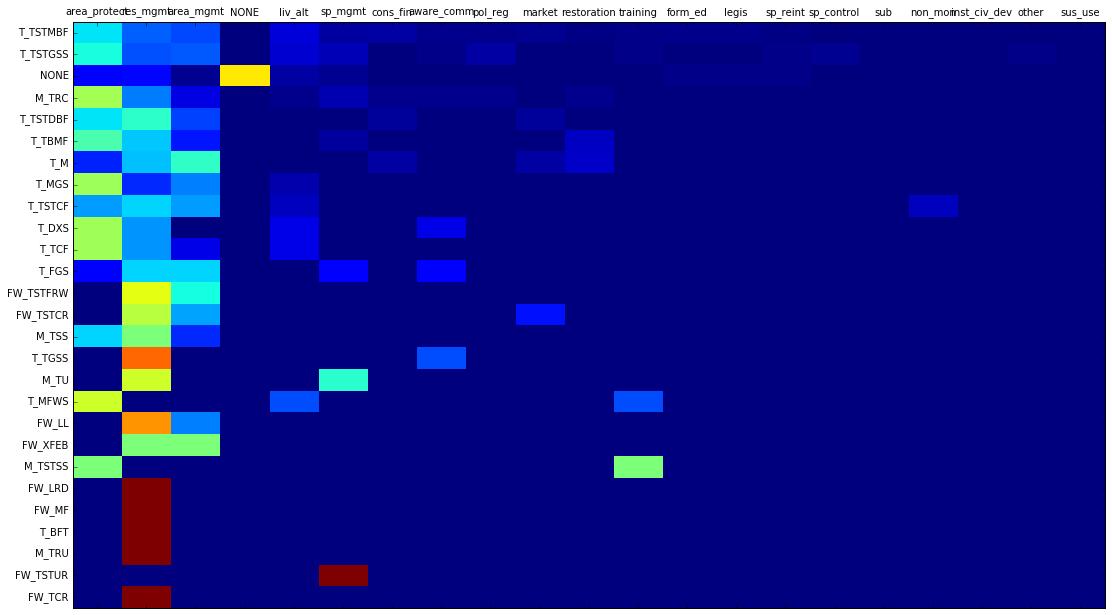

In [28]:
m = len(biomeMap)
n = len(internvMap)
rowmat2 = (matrix2 / matrix2.sum(axis=1)[:,None])*100

outbio = pd.DataFrame(data=rowmat2,columns=intervdf.keys(),index=biomedf.keys())
show = plt.matshow(outbio, interpolation='nearest', aspect='auto')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

ax = show.axes
_ = ax.set_xticks(np.linspace(0, n-1, n))
_ = ax.set_xticklabels(outbio.columns)
_ = ax.set_yticks(np.linspace(0, m-1, m))
_ = ax.set_yticklabels(outbio.index)


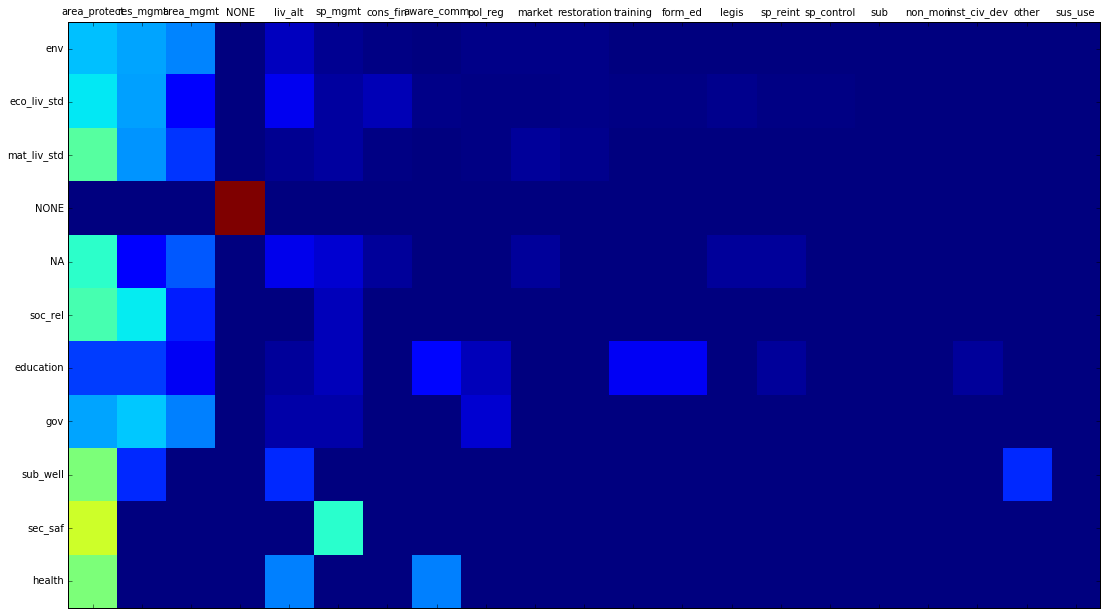

In [30]:
m = len(outcomeMap)
n = len(internvMap)

rowmat3 = (matrix3 / matrix3.sum(axis=1)[:,None])*100

outbio = pd.DataFrame(data=rowmat3,columns=intervdf.keys(),index=outcomedf.keys())
show = plt.matshow(outbio, interpolation='nearest', aspect='auto')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

ax = show.axes
_ = ax.set_xticks(np.linspace(0, n-1, n))
_ = ax.set_xticklabels(outbio.columns)
_ = ax.set_yticks(np.linspace(0, m-1, m))
_ = ax.set_yticklabels(outbio.index)
